# First post!

On this brog I intend to post some notebook-based python tutorials, mainly for transport phenomena.

While you're at it, let's solve a control problem:

### Python modules
The bread and butter - numpy and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The specific one

In [2]:
from scipy import signal

Say you want to regulate the temperature of a room with an air-conditioner.

You wish the temperature to remain constant at 23°C, and your only controller would be an on/off switch.

Consider, also, that you know the system's time constant $$\tau = 100~ms$$

what frequency would you need to flip the switch in order to maintain the room at 23°C, with, say, 0.5°C of tolerance?

Let's start with $f = 2$ Hz, twice per second.

The system's first-order transfer function would look like $$G(s) = \frac{1}{\tau s + 1}$$

a typical low-pass filter.

We can employ the submodule `scipy.signal` to generate such disturbance, a square wave with frequency 2 Hz, as well as to evaluate the system's response.

#### Fist step - time signal

- Start by generating an array of time instants which will be employed in the simulation of both the disturbance and the response.
- Compute the transfer function, here the function `signal.TransferFunction` is applied.
- Simulate the disturbance, a square wave, `signal.square`, around the temperature of 23°C.
- Evaluate the system's time response, `signal.lsim2` (it works better than `signal.lsim`).

In [3]:
t = np.arange(0,10,0.001)
tau = 100e-3
tf = signal.TransferFunction([1],[tau,1])
u = 2*signal.square(2*np.pi*2*t,duty=0.5) + 23
response = signal.lsim2(tf,U=u,T=t,X0=0.5)

#### Step two - frequency spectrum, fourier transform
- `np.fft.fft` the shit of it.

In [4]:
U = np.fft.fft(u)
U = 2 * U / len(U)
U[0] = U[0] / 2
ufreq = np.fft.fftfreq(len(U),d=0.001)
resp_freq = np.fft.fft(response[1])
resp_freq = 2 * resp_freq / len(resp_freq)
resp_freq[0] = resp_freq[0] / 2
idx = np.argsort(ufreq)

#### Step three - plot the results
- Everything's better with a beautiful chart.

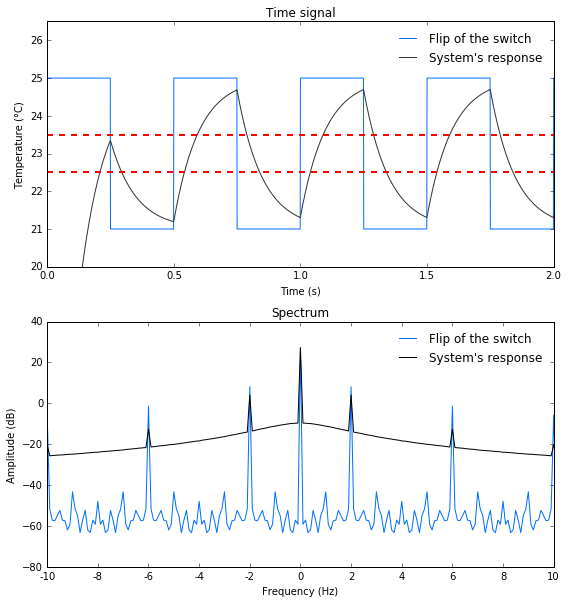

In [5]:
fig = plt.figure(figsize=(8,12/np.sqrt(2)))
ax1 = fig.add_subplot(211)
ax1.plot(t,u,color='#006FFF',label='Flip of the switch')
ax1.plot(response[0],response[1],color='#333333',label="System's response")
ax1.plot([0,10],[23.5,23.5],'--r',lw=2)
ax1.plot([0,10],[22.5,22.5],'--r',lw=2)
ax1.set_xlim([0,2])
ax1.set_ylim([20,26.5])
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Time signal')
plt.legend(frameon=False);

ax2 = fig.add_subplot(212)
ax2.plot(ufreq[idx],20*np.log10(abs(U[idx])),'-',
         color='#006FFF',label='Flip of the switch')
ax2.plot(ufreq[idx],20*np.log10(abs(resp_freq[idx])),'k-',
         label="System's response")
ax2.set_xlabel('Frequency (Hz)')
ax2.set_xticks(np.arange(-10,11,2))
ax2.set_xticklabels(np.arange(-10,11,2))
ax2.set_ylabel('Amplitude (dB)')
ax2.set_xlim([-10,10])
ax2.set_title('Spectrum')
plt.legend(frameon=False)
plt.tight_layout();

#### Now what?

Well, looking at the first chart it is clear that the variation is way bigger than the previously defined limits. The frequency response also hints at it, given the amplitude gain at 2 Hz being too big (~1.6x).

We would need a higher frequency, for example $f = 10$ Hz, five times faster (ignore the fact that the switch would probably break due to fatigue).

#### See "first step"

In [6]:
u = 2*signal.square(2*np.pi*10*t,duty=0.5) + 23
response = signal.lsim2(tf,U=u,T=t,X0=0.5)

#### See "step two"

In [7]:
U = np.fft.fft(u)
U = 2 * U / len(U)
U[0] = U[0] / 2
ufreq = np.fft.fftfreq(len(U),d=0.001)
resp_freq = np.fft.fft(response[1])
resp_freq = 2 * resp_freq / len(resp_freq)
resp_freq[0] = resp_freq[0] / 2
idx = np.argsort(ufreq)

#### See "step three" (more charts!)

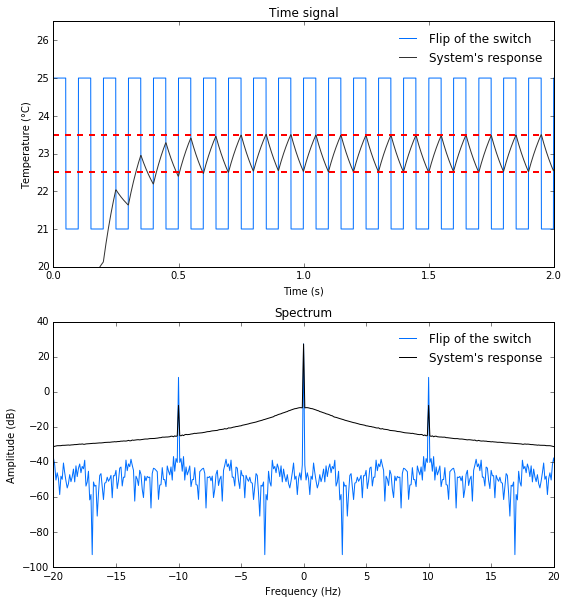

In [8]:
fig = plt.figure(figsize=(8,12/np.sqrt(2)))
ax1 = fig.add_subplot(211)
ax1.plot(t,u,color='#006FFF',label='Flip of the switch')
ax1.plot(response[0],response[1],color='#333333',label="System's response")
ax1.plot([0,10],[23.5,23.5],'--r',lw=2)
ax1.plot([0,10],[22.5,22.5],'--r',lw=2)
ax1.set_xlim([0,2])
ax1.set_ylim([20,26.5])
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Time signal')
plt.legend(frameon=False);

ax2 = fig.add_subplot(212)
ax2.plot(ufreq[idx],20*np.log10(abs(U[idx])),'-',
         color='#006FFF',label='Flip of the switch')
ax2.plot(ufreq[idx],20*np.log10(abs(resp_freq[idx])),'k-',
         label="System's response")
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude (dB)')
ax2.set_xlim([-20,20])
ax2.set_title('Spectrum')
plt.legend(frameon=False)
plt.tight_layout();

#### We did it!

Now both plots show the frequency is adequated, the temperature is within boundaries and the gain at the 10 Hz frequency is only ~0.4x - you can comfortably be in your 23°C room, congrats!